In [31]:
import networkx as nx
%matplotlib inline

# Data-driven Business and Behaviour Analytics (DBBA)
# Tutorial: 3 - Hubs, centrality, and network models
## PART I

In this tutorial we will put in practice what we learned about the different ways to characterise node importance and find important nodes.

### pro tip: by default, `nx.read_edgelist` assumes node names are strings

Edge lists are a simple, plain text format for storing graphs. Since this simple file format doesn't contain information about data types, all node names are assumed to be strings by default. When the node names are given by integers, as they are in this example, we should specify the `nodetype=int` keyword argument to avoid confusion with the node names.

Load one of the networks used in the previous tutorials

In [32]:
# G = nx.read_edgelist('PATHTONETWORK/network', nodetype=int)

G = nx.Graph()

G.add_nodes_from(["Mark", "John", "Theresa", "Patrick"])

G.add_edges_from([("Mark","John"),("John","Theresa"),("Mark","Theresa"),("Mark","Patrick")])

# info method has been removed from networkx 3
# print(nx.info(G))
print(G)

Graph with 4 nodes and 4 edges


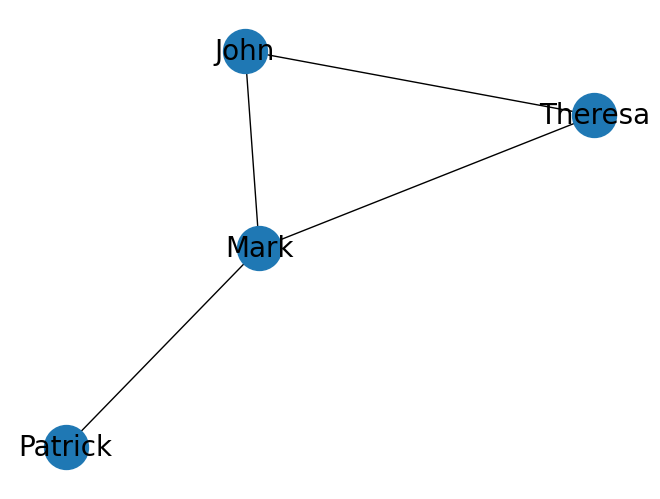

In [33]:
# nx.draw(G)
nx.draw(G, with_labels=True,
        node_size=1000,
        font_size=20)

## Finding the node with max degree

We can apply the `max` function to get the maximum node according to some criterion. In our case, we want to compare the nodes by their degree:

In [34]:
highest_degree_node = max(G.nodes, key=G.degree)
highest_degree_node

'Mark'

In [35]:
G.degree(highest_degree_node)

3

## Finding hubs

NetworkX provides many functions regarding the computation of different types of centralities, each one with its own peculiarities and functionalities. 

The __eigenvector centrality__ computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node $i$ is the $i$-th element of the vector $x$ defined by the equation

$$Ax=λx$$

where $A$ is the adjacency matrix of the graph $G$ with eigenvalue $λ$.

In [36]:
nx.eigenvector_centrality(G)

{'Mark': 0.6116286437343044,
 'John': 0.5227204550943347,
 'Theresa': 0.5227204550943347,
 'Patrick': 0.28184579793865727}

The __Katz centrality__ computes the centrality for a node based on the centrality of its neighbors. It is a generalization of the eigenvector centrality. The Katz centrality for node $i$ is

$$x_i=\alpha \sum_{j} A_{ij}x_j+\beta,$$

where $A$ is the adjacency matrix of graph $G$ with eigenvalues $λ.$

The parameter $\beta$ controls the initial centrality and $$\alpha<\frac{1}{\lambda_{max}}.$$

The __Katz centrality__ computes the relative influence of a node within a network by measuring the number of the immediate neighbors (first degree nodes) and also all other nodes in the network that connect to the node under consideration through these immediate neighbors. Extra weight can be provided to immediate neighbors through the parameter $\beta$. Connections made with distant neighbors are, however, penalized by an attenuation factor $\alpha$ which should be strictly less than the inverse largest eigenvalue of the adjacency matrix in order for the Katz centrality to be computed correctly.

The __Katz centrality__ is a computationally-intense function and that is why it can fail when dealing with very large network data. If this is the case, the [Numpy](https://numpy.org/doc/stable/) implementation of the original function can be used.

In [37]:
nx.katz_centrality(G)

{'Mark': 0.542243933012952,
 'John': 0.501233889859248,
 'Theresa': 0.501233889859248,
 'Patrick': 0.4511105102120538}

In [38]:
nx.katz_centrality_numpy(G)

{'Mark': 0.5422439369776947,
 'John': 0.5012338913239196,
 'Theresa': 0.5012338913239196,
 'Patrick': 0.45111050219152754}

The __betweenness centrality__ of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$

$$c_B(v)=\sum_{s,t \in V} \frac{\sigma(s,t|v)}{\sigma(s,t)}$$

where $V$ is the set of nodes, $\sigma(s,t)$ is the number of shortest $(s,t)$-paths, and $\sigma(s,t|v)$ is the number of those paths passing through some node $v$ other than $s,t$. If $s=t$, $\sigma(s,t)=1$, and if $v \in s,t$ $\sigma(s,t|v)=0$.

In [39]:
nx.betweenness_centrality(G)

{'Mark': 0.6666666666666666, 'John': 0.0, 'Theresa': 0.0, 'Patrick': 0.0}

## Centrality distributions

An efficient way of illustrating the centrality information regarding all the nodes in a network is a centrality distribution, it summarizes the most important properties across the graph. First, we have to build a sequence with all the centralities. As the function returns a dictionary, we use a list comprehension with the dictionary values i.e., `.values()`. Let's start from the __eigenvector centrality__!

In [48]:
eigenvec_centr = list(nx.eigenvector_centrality(G).values())

In [49]:
import numpy as np

print('Mean centrality:', np.mean(eigenvec_centr))
print('Median centrality:', np.median(eigenvec_centr))

Mean centrality: 0.447213595499958
Median centrality: 0.4472135954999579


An useful way of graphically representing the sequences of centrality values is by a _histogram_, plotting on the $x$-axis the centrality values and on the $y$-axis the number of nodes having that centrality.

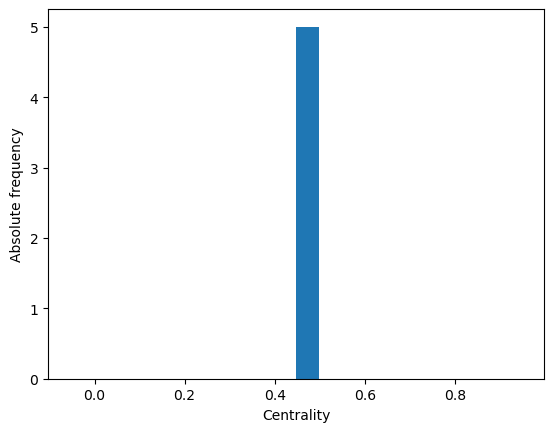

In [50]:
import matplotlib.pyplot as plt

counts, bins, patches = plt.hist(eigenvec_centr, bins=20)
plt.xlabel("Centrality")
plt.ylabel("Absolute frequency")
plt.show()

Returning `counts` and `bins`, we can investigate further them or analyse a given bin and how many values fall into.

In [43]:
counts

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 1.])

In [44]:
bins

array([0.2818458 , 0.29833494, 0.31482408, 0.33131322, 0.34780237,
       0.36429151, 0.38078065, 0.39726979, 0.41375894, 0.43024808,
       0.44673722, 0.46322636, 0.47971551, 0.49620465, 0.51269379,
       0.52918293, 0.54567207, 0.56216122, 0.57865036, 0.5951395 ,
       0.61162864])

## PART II

Contents:
1. [Python's random module](#1.-Python's-random-module)
2. [Random network model](#2.-Random-Network-Model)
3. [Small-World model](#3.-Small-World-Model)
4. [Preferential attachment model](#4.-Preferential-Attachment-Model)

For each of the models presented in this tutorial, we present the algorithm, an example implementation, and the corresponding NetworkX code function to generate the model. The implementations provided in this tutorial are written for clarity, not for efficiency; it's best to use the NetworkX functions when doing real analysis work.

## 1. Python's `random` module

Many network models rely on randomness in their generative algorithms. Python's [random module](https://docs.python.org/3.7/library/random.html) provides four key functions of use when coding network models.

### `random.random`

Often in an algorithm, we need something to happen with some probability $p$. The canonical way to decide whether or not such an event happens is to generate a random number $r$ between 0 and 1, and if $r < p$, then the event occurs. The [random.random()](https://docs.python.org/3.7/library/random.html#random.random) function returns just such a random number in the interval [0, 1).

For a simple example, consider an unfair coin that comes up heads 75% of the time. We can write the following code to flip such a coin 10 times, reporting the outcome each time:

In [45]:
import random
p = 0.75

# Do this 10 times
for _ in range(10):
    r = random.random()
    if r < p:
        print('Heads')
    else:
        print('Tails')

Heads
Heads
Heads
Tails
Tails
Heads
Heads
Heads
Heads
Tails


As we would expect from a random process, executing the previous cell again will generate a different sequence of flips -- each one is independently generated.

###  `random.choice`

When we have a population of discrete choices and we need to select one at random, we use [random.choice()](https://docs.python.org/3.7/library/random.html#random.choice). For example, instead of "[eeny, meeny, miny, moe](https://en.wikipedia.org/wiki/Eeny,_meeny,_miny,_moe)," we can use random.choice to choose a random name:

In [46]:
names = ['Alice', 'Bob', 'Cathy', 'Dan']
ran = random.choice(names)
print(ran)

Bob


### `random.sample`

If we have a collection and we need to select more than one element without replacement, we use [random.sample()](https://docs.python.org/3.7/library/random.html#random.sample). For example, to choose two nodes at random from the nodes in a graph, we can use the following:

In [54]:
G = nx.cycle_graph(5)
print(G.nodes)
random.sample(list(G.nodes), 2)

[0, 1, 2, 3, 4]


[4, 3]

### `random.choices`

We use [random.choices()](https://docs.python.org/3.7/library/random.html#random.choices) when we need to choose an element from a collection when the chances of selecting each element are not identical.

For an example, let's assume Alice, Bob, and Carol are in a raffle drawing. Alice bought one ticket, Bob bought three tickets, and Carol bought four tickets. We can simulate ten different draws of this raffle, replacing the drawn ticket each time, with the following code:

In [58]:
names = ['Alice', 'Bob', 'Carol']
tickets = [1, 3, 4]

for _ in range(10):
    print(random.choices(names, tickets))

['Bob']
['Bob']
['Carol']
['Carol']
['Carol']
['Carol']
['Bob']
['Bob']
['Carol']
['Carol']


Running the above cell should give what we expect: Carol wins the drawing most often, with Bob winning some times, and Alice winning occasionally. Of course this outcome depends on the luck of the draw!

By specifying the keyword argument `k=`, we can choose *k* items from the collection *with replacement*:

In [62]:
random.choices(names, tickets, k=10)

['Bob',
 'Alice',
 'Bob',
 'Carol',
 'Bob',
 'Bob',
 'Alice',
 'Carol',
 'Bob',
 'Carol']

The weights provided to `random.choices` do not have to be integers -- any numeric weights are fine.

## 2. Random Network Model

The random network model, as formulated by Gilbert, has two parameters: the number of nodes $N$, and the link probability $p$. As in the book text, the algorithm for creating this network is as follows:

1. Select a pair of nodes, say i and j.
2. Generate a random number r between 0 and 1. If r < p, then add a link between i and j.
3. Repeat (1) and (2) for all pairs of nodes.

We'll need a couple of tools from Python for this task:

### Generating combinations

We've previously looped over all nodes in a graph, as well as all graph edges, but this algorithm requires us to loop over all *pairs* of nodes, *i.e.* all possible edges. The `itertools` module in Python's standard library gives us the [combinations()](https://docs.python.org/3.7/library/itertools.html#itertools.combinations) function, an elegant way to loop over pairs of elements in a sequence:

In [64]:
import itertools

elements = [0, 1, 2, 3, 4]
list(itertools.combinations(elements, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

The second argument to `itertools.combinations()` is the length of the sequences we want in the output. Since we want pairs, we'll specify 2. Note the nice properties of the output:

1. No repeat elements -- we don't want to consider self-loops like `('a', 'a')`.
2. Pairs are in sorted order -- `('a', 'b')` and `('b', 'a')` are the same edge in an undirected graph.

We can thus use this to loop over all pairs of nodes in a graph:

In [65]:
G = nx.Graph()
G.add_nodes_from(elements)

list(itertools.combinations(G.nodes, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

### Gilbert random graph model

With these tools in our toolbelt, we can code the algorithm for the Gilbert random graph model.

In [66]:
def gnp_random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i, j in itertools.combinations(G.nodes, 2):
        r = random.random()
        if r < p:
            G.add_edge(i, j)
        # Do nothing if r >= p
        
    return G

We can use this function to generate a graph. Since this is a random graph, each execution of the following code will generate a different graph. 

Graph has 21 edges.


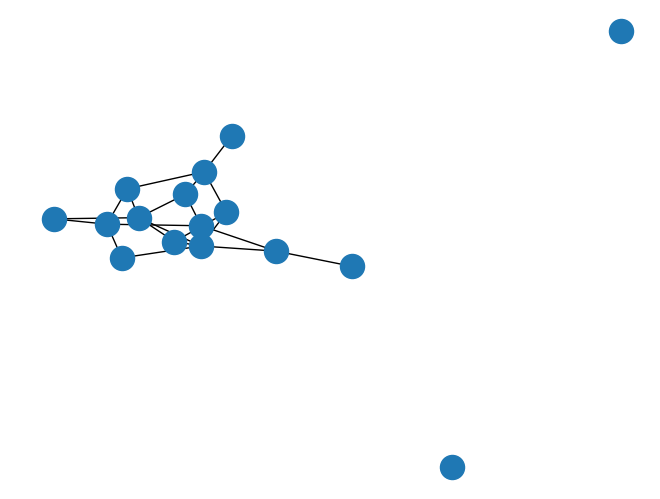

In [67]:
G = gnp_random_graph(16, 0.15)
nx.draw(G)
print('Graph has', G.number_of_edges(), 'edges.')

Run the above cell a few times and note that the number of edges varies slightly among random graphs generated with the same parameters. This is because each pair of nodes has an independent chance of being an edge.

### Erdös-Rényi random graph model

Instead of specifying the link probability $p$, we can also generate a graph of $N$ nodes with exactly $M$ edges by using `random.sample()` to choose M of the possible edges generated with `itertools.combinations()`:

In [68]:
def gnm_random_graph(N, M):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    possible_edges = itertools.combinations(G.nodes, 2)
    edges_to_add = random.sample(list(possible_edges), M)
    G.add_edges_from(edges_to_add)
    
    return G

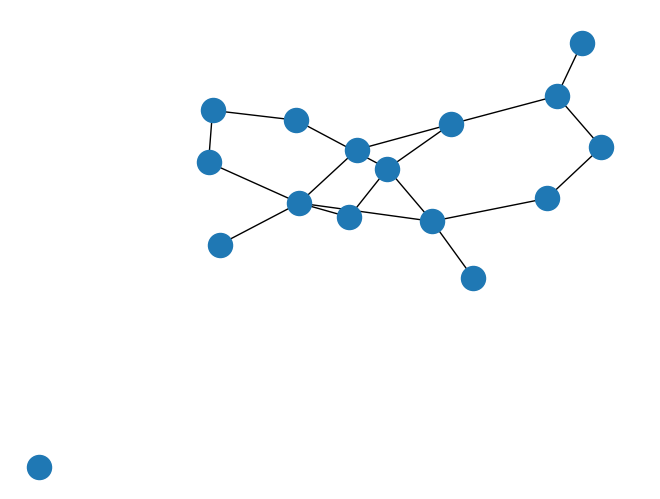

In [69]:
G = gnm_random_graph(16, 18)
nx.draw(G)

### NetworkX functions

NetworkX has a function for the $G_{n,p}$ random graph specifying number of nodes $N$ and link probability $p$:  [gnp_random_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html).

In addition, NetworkX provides [gnm_random_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html), which generates a $G_{n,m}$ graph, where we specify the number of nodes $N$ and the desired number of edges $M$.

## 3. Small-World Model

The algorithm for generating a small-world network is as such:

1. Begin with a ring of $N$ nodes
2. Connect each node to its $k$ nearest neighbors (or $k-1$ if k is odd).
3. For each edge $(u, v)$, with probability $p$, replace edge $(u, v)$ with $(u, w)$ where $w$ is not a neighbor of $u$.

We'll do these step-by-step first, and combine them into a function last.

### Create a ring of N nodes

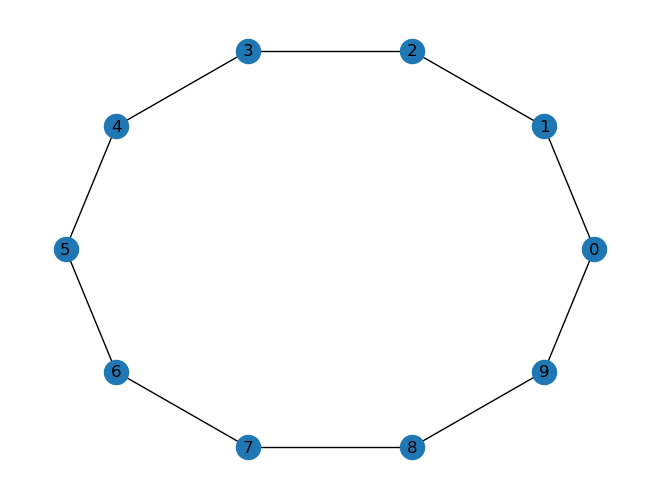

In [70]:
N = 10
G = nx.cycle_graph(N)
nx.draw_circular(G, with_labels=True)

### Connect each node to its $k$ nearest neighbors

We'll use modular arithmetic in order to do this. As an example of why, let's say $k$ is 4. So for node $n$, we want to add edges to $n$'s 4 nearest neighbors: $n-1, n+1, n-2,$ and $n+2.$ Since our nodes are in a circle, these can "wrap around", *e.g.* the 4 nearest neighbors of node 0 are N-1, 1, N-2, and 2.

Note the use of integer division (//) below. Integer division throws away the fractional part of division, e.g.

    5 // 2 = 2

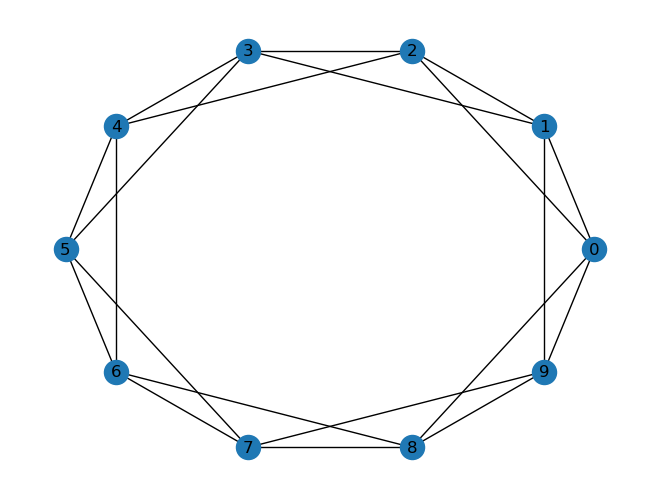

In [71]:
k = 4

for n in G.nodes:
    for i in range(1, k // 2 + 1):
        left  = (n-i) % N
        right = (n+i) % N 
        G.add_edge(n, left)
        G.add_edge(n, right)

nx.draw_circular(G, with_labels=True)

### Rewire some edges

> For each edge $(u, v)$, with probability $p$, replace edge $(u, v)$ with (u, w) where $w$ is not a neighbor of $u$.

For this step, we make use of set arithmetic in order to generate a list of nodes that are not neighbors of $u$, and `random.choice` to select $w$ at random from that set of "not neighbors."

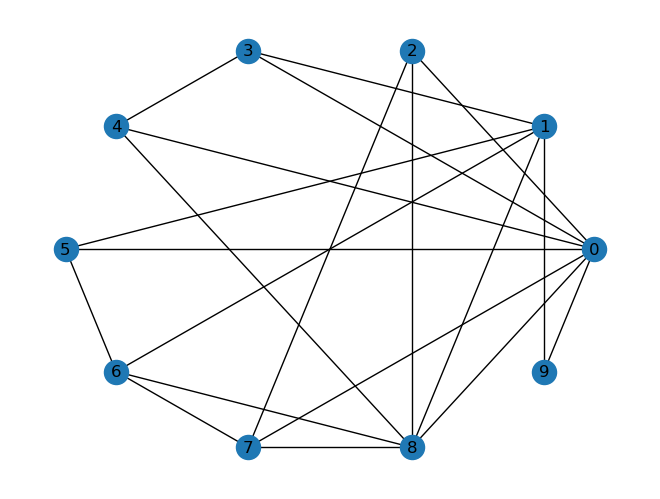

In [76]:
p = 0.1

for u, v in list(G.edges):
    if random.random() < p:
        not_neighbors = set(G.nodes) - set(G.neighbors(u))
        w = random.choice(list(not_neighbors))
        G.remove_edge(u, v)
        G.add_edge(u, w)

nx.draw_circular(G, with_labels=True)

### Watts-Strogatz Small-World Model

We can put this together to write a basic function for the small-world model:

In [77]:
def watts_strogatz_graph(N, k, p):
    # 1. Create a ring of N nodes
    G = nx.cycle_graph(N)

    # 2. Connect each node n to k nearest neighbors
    #    [n-(k//2), ... , n-1, n+1, ... , n+(k//2)]
    for n in G.nodes:
        for i in range(1, k // 2 + 1):
            left  = (n-i) % N
            right = (n+i) % N 
            G.add_edge(n, left)
            G.add_edge(n, right)
    
    # 3. Rewire edges with probability p
    for u, v in list(G.edges):
        if random.random() < p:
            not_neighbors = set(G.nodes) - set(G.neighbors(u)) - {u}
            w = random.choice(list(not_neighbors))
            G.remove_edge(u, v)
            G.add_edge(u, w)

    return G

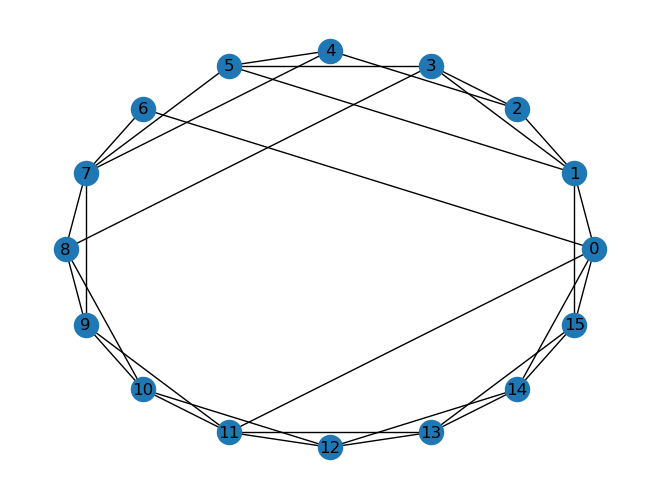

In [78]:
G = watts_strogatz_graph(16, 4, 0.2)
nx.draw_circular(G, with_labels=True)

### NetworkX function

NetworkX has a function for this model: [watts_strogatz_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html).

## 4. Preferential Attachment Model

The Barabási-Albert preferential attachment model has two parameters: the number of nodes $N$, and the number of links added at each step $m$. Given these parameters, the algorithm is as follows:

1. Start with a clique of $m + 1$ nodes.
2. Select $m$ different nodes at random, weighted by their degree.
3. Add a new node $i$ and link it with the $m$ nodes from the previous step.
4. Repeat 2-3 until there are N nodes in the graph.

The code for this is thus straightforward, with one possible exception: for step 3, we need to generate a *degree sequence* to weight the random selection. If we have a graph `G`, we can generate such a degree sequence with a list comprehension as follows:

[4, 1, 1, 1, 1]


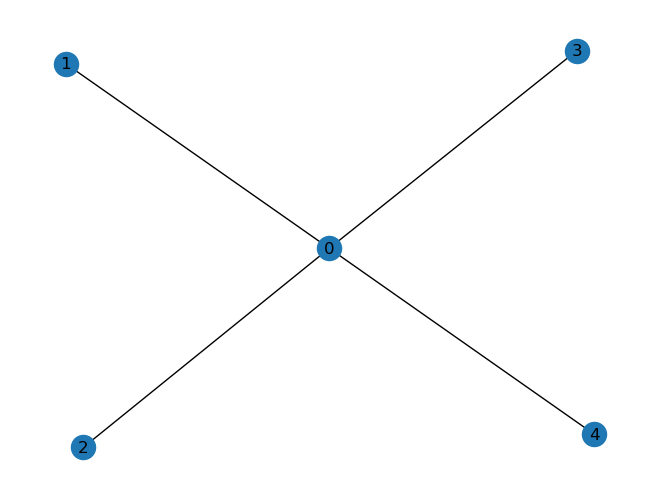

In [79]:
G = nx.star_graph(4)
degrees = [G.degree(n) for n in G.nodes]

print(degrees)
nx.draw(G, with_labels=True)

Note that the degree sequence is output in the same order as the nodes, such that the node at index $i$ in that list has the degree at index $i$ of the corresponding degree sequence. With this, we can write a function for the BA preferential attachment model:

In [80]:
def barabasi_albert_graph(N, m):
    # 1. Start with a clique of m+1 nodes
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        # 2. Select m different nodes at random, weighted by their degree.
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) for n in possible_neighbors]
            j = random.choices(possible_neighbors, degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        # 3. Add a new node i and link it with the m nodes from the previous step.
        for j in new_neighbors:
            G.add_edge(i, j)

    return G

# EXERCISE 1

Load the weekly Bitcoin transaction dataset, and plot the degree distributions (i.e., in-degrees, out-degrees, total degrees).

HINT: use the function <a href="https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.graphml.read_graphml.html#networkx.readwrite.graphml.read_graphml">nx.read_graphml()</a> to open the network. 

# EXERCISE 2

Find the 5 largest hubs based on their in-degree, out-degree, and total degree. Do these three lists overlap? Discuss the results.

# EXERCISE 3 (Optional)

Compute the centrality values of the nodes in the bitcoin network, using betweenness and closeness. Do you see any differences between the two distributions?